# Encuestas Electivos 2020
## Prefacio
Estas encuestas representan un sondeo realizado durante la segunda
mitad del año 2019 con el objetivo de determiar los intereses de los
estudiantes en la creación y/o modificación de los ramos electivos.

## Metodología
Las encuestas se realizaron entre el primer año medio hasta el tercer año medio
utilizando la plataforma Google Forms presencialmente. Se les solicitó a los
estudiantes colocar una nota de 1 (mínima) a 7 (máxima) que representara
a los estudiantes el interes que tendría en la existencia de cada uno de los
electivos propuestos.

____

### Importación de las encuestas

In [8]:
import gspread as gs
from oauth2client.service_account import ServiceAccountCredentials
from collections import Counter
import matplotlib.pyplot as plt

#Conseguimos las credenciales para usar la API de Google Drive
scope = ['https://spreadsheets.google.com/feeds', 'https://www.googleapis.com/auth/drive']
creds = ServiceAccountCredentials.from_json_keyfile_name('creds.json', scope)
cliente = gs.authorize(creds)

#Abrimos las hojas y archivos
encuestas = [cliente.open("Encuesta Electivos I° (respuestas)").sheet1,
             cliente.open("Encuesta Electivos II° (respuestas)").sheet1,
             cliente.open("Encuesta Electivos III° (respuestas)").sheet1]

electivos_filosofia = {"Filosofía Política": 3,
                        "Filosofía e Historia del Arte": 4,
                        "Filosofía e Historia de las Ciencias": 5,
                        "Escritura Filosófica y Debate": 6}

## Filosofía

### Distrubución de notas por electivo

In [9]:
def plot_distribiucion_area_curso(electivos, index_curso):
    for i in electivos.keys():
        notas = encuestas[index_curso].col_values(electivos[i])[1:]
        ocurrencia = Counter(notas)
    
        plt.bar(*zip(*sorted(ocurrencia.items())))
        plt.title(i)
        plt.xlabel('Nota')
        plt.ylabel('Cantidad')
        plt.show()

#### Iº:

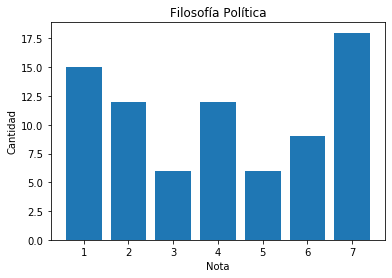

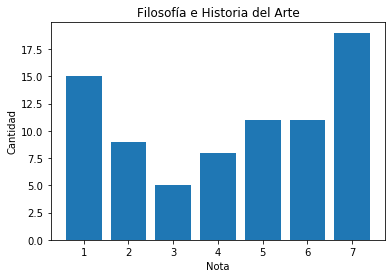

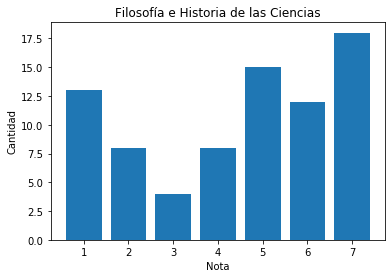

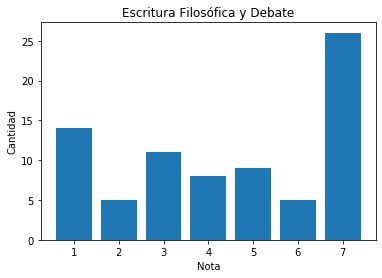

In [10]:
plot_distribiucion_area_curso(electivos_filosofia, 0)
    

#### IIº:

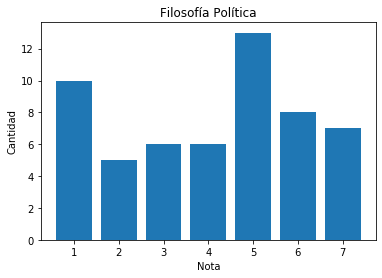

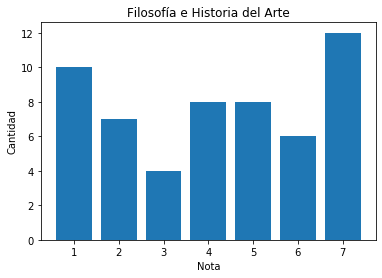

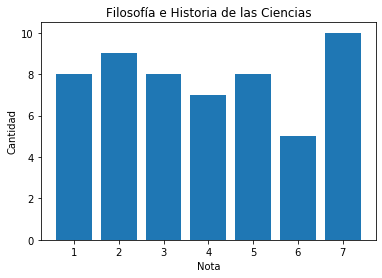

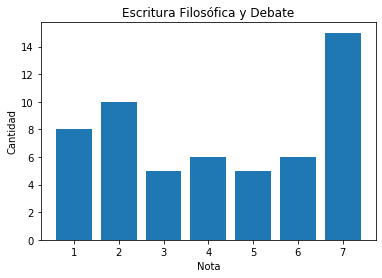

In [11]:
plot_distribiucion_area_curso(electivos_filosofia, 1)

#### IIIº:

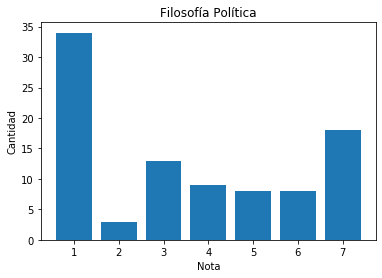

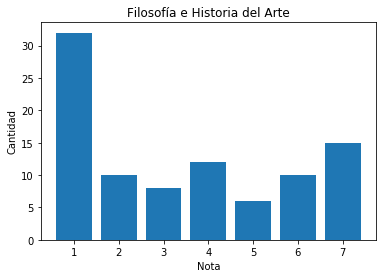

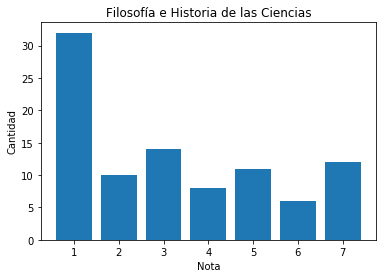

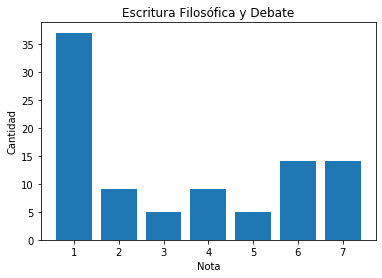

In [12]:
plot_distribiucion_area_curso(electivos_filosofia, 2)


### Promedio de notas por curso

In [13]:
def plot_promedio_curso(electivos, index_curso):
    promedios = {}
    for i in electivos.keys():
        notas = encuestas[index_curso].col_values(electivos[i])[1:]
        for x in range(len(notas)):
            notas[x] = int(notas[x])
        promedio = sum(notas)/len(notas)
        promedios[i] = promedio
    
    plt.bar(*zip(*promedios.items()))
    plt.title("Promedio de notas por elecetivo")
    plt.xlabel('Nota')
    plt.ylabel('Electivo')
    plt.show()
        

#### Iº:

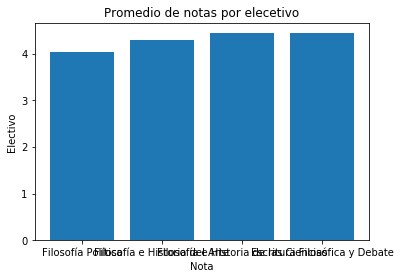

In [14]:
plot_promedio_curso(electivos_filosofia, 0)

#### IIº:

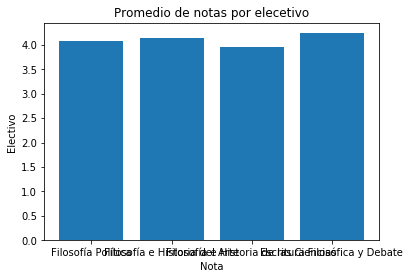

In [15]:
plot_promedio_curso(electivos_filosofia, 1)

#### IIIº:

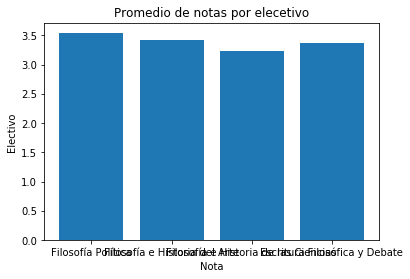

In [16]:
plot_promedio_curso(electivos_filosofia, 2)
